In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDRegressor,LinearRegression,SGDClassifier,LogisticRegression
from sklearn.metrics import mean_squared_error,roc_auc_score,accuracy_score,log_loss
from sklearn.datasets import load_breast_cancer,load_files
from sklearn.feature_extraction.text import CountVectorizer
from scipy.sparse import csr_matrix

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/Yorko/mlcourse.ai/master/data/weights_heights.csv')
data

,Index,Height,Weight
0,1,65.78331,112.9925
1,2,71.51521,136.4873
2,3,69.39874,153.0269
3,4,68.21660,142.3354
4,5,67.78781,144.2971
...,...,...,...
24995,24996,69.50215,118.0312
24996,24997,64.54826,120.1932
24997,24998,64.69855,118.2655
24998,24999,67.52918,132.2682


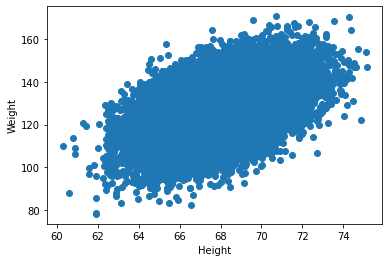

In [3]:
plt.scatter(data['Height'],data['Weight']);
plt.xlabel('Height');
plt.ylabel('Weight');

In [4]:
X , y = data['Weight'] , data['Height']
X.shape , y.shape

((25000,), (25000,))

In [5]:
X_train , X_valid, y_train , y_valid = train_test_split(X,y,test_size=0.3,random_state=17)
X_train.shape , X_valid.shape , y_train.shape , y_valid.shape

((17500,), (7500,), (17500,), (7500,))

In [6]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.values.reshape([X_train.shape[0], 1]))
X_valid_scaled = scaler.transform(X_valid.values.reshape([X_valid.shape[0], 1]))

In [7]:
%%time
sgd_reg = SGDRegressor()
sgd_reg.fit(X_train_scaled,y_train)
mean_squared_error(y_valid,sgd_reg.predict(X_valid_scaled))

Wall time: 34 ms


2.6707524767630866

In [8]:
%%time
lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled,y_train)
mean_squared_error(y_valid,lin_reg.predict(X_valid_scaled))

Wall time: 33 ms


2.670830767667635

In [9]:
data = load_breast_cancer()
X , y = data.data , [-1 if i == 0 else 1 for i in data.target]

In [10]:
len(X) , len(y)

(569, 569)

In [11]:
X_train , X_valid , y_train , y_valid = train_test_split(X,y,test_size=0.3,random_state=17)
len(X_train) , len(X_valid) , len(y_train) , len(y_valid)

(398, 171, 398, 171)

In [12]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)

In [13]:
%%time
sgd_clf =  SGDClassifier(eta0=10**-3,n_iter_no_change=3,n_jobs=-1)
sgd_clf.fit(X_train_scaled,y_train)
roc_auc_score(y_valid,sgd_clf.predict(X_valid_scaled)) , accuracy_score(y_valid,sgd_clf.predict(X_valid_scaled)) \
,log_loss(y_valid,sgd_clf.predict(X_valid_scaled))

Wall time: 9 ms


(0.949925484351714, 0.9590643274853801, 1.4138914195995664)

In [14]:
%%time 
log_reg = LogisticRegression(random_state=17)
log_reg.fit(X_train_scaled,y_train)
roc_auc_score(y_valid,log_reg.predict(X_valid_scaled)) , accuracy_score(y_valid,log_reg.predict(X_valid_scaled))\
,log_loss(y_valid,log_reg.predict(X_valid_scaled))

Wall time: 38 ms


(0.9672131147540984, 0.9766081871345029, 0.8079432980664542)

In [15]:
%%time
reviews_train = load_files('train')
reviews_test = load_files('test')

Wall time: 7.75 s


In [16]:
X_train , y_train = reviews_train.data , reviews_train.target
X_test , y_test  = reviews_test.data , reviews_test.target

In [17]:
%%time
cv = CountVectorizer(ngram_range=(1,2))
X_train = cv.fit_transform(X_train)
X_test = cv.transform(X_test)

Wall time: 37.6 s


In [18]:
X_train.shape , X_test.shape , y_train.shape , y_test.shape

((25000, 1513832), (25000, 1513832), (25000,), (25000,))

In [19]:
%%time
log_reg = LogisticRegression(random_state=17)
log_reg.fit(X_train,y_train)
roc_auc_score(y_test,log_reg.predict(X_test))

Wall time: 55.1 s


0.8964399999999999

In [20]:
%%time
sgd_clf = SGDClassifier(n_iter_no_change=100,random_state=17)
sgd_clf.fit(X_train,y_train)
roc_auc_score(y_test,sgd_clf.predict(X_test))

Wall time: 8.77 s


0.89064

In [21]:
X_train_sparse = csr_matrix(X_train)
X_test_sparse = csr_matrix(X_test)
X_train , X_test

(<25000x1513832 sparse matrix of type '<class 'numpy.int64'>'
 	with 8765469 stored elements in Compressed Sparse Row format>,
 <25000x1513832 sparse matrix of type '<class 'numpy.int64'>'
 	with 7463840 stored elements in Compressed Sparse Row format>)

In [22]:
%%time
log_reg = LogisticRegression(random_state=17)
log_reg.fit(X_train_sparse,y_train)
roc_auc_score(y_test,log_reg.predict(X_test_sparse))

Wall time: 52.2 s


0.8964399999999999

In [23]:
%%time
sgd_clf = SGDClassifier(n_iter_no_change=100,random_state=17)
sgd_clf.fit(X,y_train)
roc_auc_score(y_test,sgd_clf.predict(X_test_sparse))

Wall time: 8.74 s


0.89064